In [1]:
import sys
!conda install --yes --prefix {sys.prefix} matplotlib

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment C:\ProgramData\Anaconda3:

The following NEW packages will be INSTALLED:

    kiwisolver: 1.0.1-py36h12c3424_0 

The following packages will be UPDATED:

    anaconda:   5.0.1-py36h8316230_2  --> custom-py36h363777c_0
    conda:      4.3.30-py36h7e176b0_0 --> 4.4.11-py36_0        
    libpng:     1.6.32-vc14h5163883_3 --> 1.6.34-h79bbb47_0    
    matplotlib: 2.1.0-py36h11b4b9c_0  --> 2.2.0-py36h4dabdea_0 
    pycosat:    0.6.2-py36hf17546d_1  --> 0.6.3-py36h413d8a4_0 




CondaIOError: Missing write permissions in: C:\ProgramData\Anaconda3
#
# You don't appear to have the necessary permissions to install packages
# into the install area 'C:\ProgramData\Anaconda3'.
# However you can clone this environment into your home directory and
# then make changes to it.
# This may be done using the command:
#
# $ conda create -n my_root --clone="C:\ProgramData\Anaconda3"




Loading the data

In [5]:
from IPython.display import Image
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
data = read_csv('driver_features_2.txt', delimiter='\t',header=None)
X=data.iloc[:, 0:9].values

Checking for optimal number of cluster

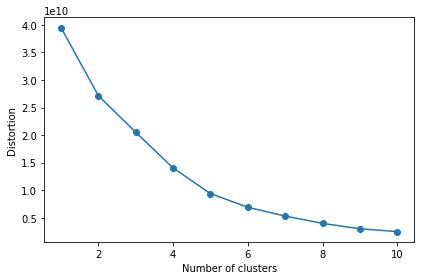

Distortion: 2488560672.97


In [6]:
distortions = []
from sklearn.cluster import KMeans
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()
print('Distortion: %.2f' % km.inertia_)

It seems from the elbow test that the number of cluster is 5. So let us try with number of cluster as 5

In [7]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, 
            init='random', 
            n_init=10, 
            max_iter=3000,
            tol=1e-10,
            random_state=0)

y_km = km.fit_predict(X)


Clustering is done. Now it is time to plot them properly

## We plan to do the summary statistics and box plot for the clusters formed


General thing useful for all 

In [8]:
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
columns=['car_level','driver_authorized','gender',
     'age','license_issue_1','license_issue_2',
     'work_time','service_score']

### Cluster #1

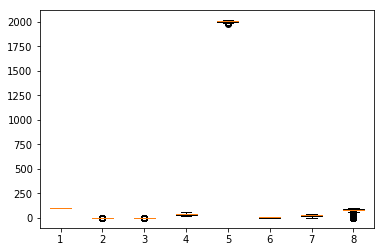

In [134]:
cl_1=X[y_km==0]
plt.boxplot(cl_1);

In [122]:
df = pd.DataFrame(cl_1,columns=columns)
df.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score
count,9734.0,9734.000000,9734.000000,9734.000000,9734.000000,9734.000000,9734.000000,9734.000000
mean,100.0,0.910006,0.982535,38.643928,2004.488597,6.573043,23.360089,80.792141
std,0.0,0.286188,0.131001,7.698868,5.965863,3.397795,9.384239,13.024681
min,100.0,0.000000,0.000000,22.000000,1981.000000,1.000000,0.002900,0.004100
25%,100.0,1.000000,1.000000,33.000000,2001.000000,4.000000,16.948150,77.673050
50%,100.0,1.000000,1.000000,39.000000,2006.000000,7.000000,27.120800,84.136700
75%,100.0,1.000000,1.000000,45.000000,2009.000000,9.000000,30.570600,88.126550
max,100.0,1.000000,1.000000,58.000000,2015.000000,12.000000,40.831200,100.887700


### Cluster #2

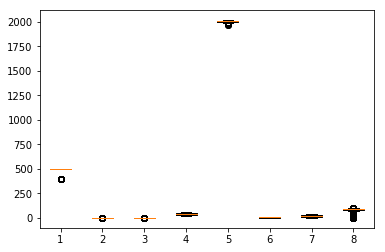

In [135]:
cl_2=X[y_km==1]
plt.boxplot(cl_2);

In [126]:
df = pd.DataFrame(cl_2,columns=columns)
df.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score
count,71741.000000,71741.000000,71741.000000,71741.000000,71741.000000,71741.000000,71741.000000,71741.000000
mean,497.973265,0.019779,0.936577,38.959214,2005.169777,6.694443,16.204334,84.440269
std,14.091438,0.139243,0.243723,8.585452,6.408580,3.400977,10.808116,9.640616
min,400.000000,0.000000,0.000000,20.000000,1966.000000,1.000000,0.000100,0.021100
25%,500.000000,0.000000,1.000000,32.000000,2001.000000,4.000000,4.832100,82.074100
50%,500.000000,0.000000,1.000000,38.000000,2007.000000,7.000000,16.857300,86.253300
75%,500.000000,0.000000,1.000000,46.000000,2010.000000,10.000000,26.887100,89.221300
max,500.000000,1.000000,1.000000,62.000000,2017.000000,12.000000,40.961100,100.974800


### Cluster#3

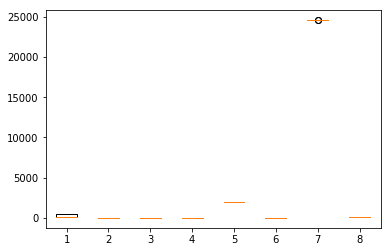

In [136]:
cl_3=X[y_km==2]
plt.boxplot(cl_3);

In [128]:
df = pd.DataFrame(cl_3,columns=columns)
df.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,271.428571,0.571429,0.428571,34.857143,2009.714286,7.142857,24568.553043,88.127471
std,213.808994,0.534522,0.534522,2.478479,2.360387,1.772811,0.243016,9.983031
min,100.000000,0.000000,0.000000,32.000000,2006.000000,5.000000,24568.056200,75.612900
25%,100.000000,0.000000,0.000000,33.000000,2008.000000,5.500000,24568.546050,78.863500
50%,100.000000,1.000000,0.000000,34.000000,2011.000000,8.000000,24568.603400,94.029900
75%,500.000000,1.000000,1.000000,37.000000,2011.500000,8.500000,24568.637800,95.832300
max,500.000000,1.000000,1.000000,38.000000,2012.000000,9.000000,24568.844000,97.857900


### Cluster#4

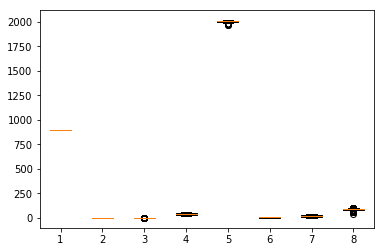

In [137]:
cl_4=X[y_km==3]
plt.boxplot(cl_4);

In [130]:
df = pd.DataFrame(cl_4,columns=columns)
df.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score
count,17979.0,17979.0,17979.000000,17979.000000,17979.000000,17979.000000,17979.000000,17979.000000
mean,900.0,0.0,0.961121,40.813171,2003.417932,6.636910,19.798982,86.291727
std,0.0,0.0,0.193311,8.481247,6.698062,3.413911,9.154004,5.214407
min,900.0,0.0,0.000000,21.000000,1964.000000,1.000000,0.026700,42.104300
25%,900.0,0.0,1.000000,34.000000,1998.000000,4.000000,13.707850,83.792100
50%,900.0,0.0,1.000000,41.000000,2005.000000,7.000000,20.430300,86.568100
75%,900.0,0.0,1.000000,47.000000,2009.000000,9.000000,28.314650,89.078050
max,900.0,0.0,1.000000,63.000000,2015.000000,12.000000,40.761900,100.711600


### Cluster#5

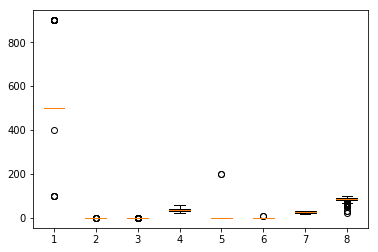

In [133]:
cl_5=X[y_km==4]
plt.boxplot(cl_5);

In [132]:
df = pd.DataFrame(cl_5,columns=columns)
df.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,512.470862,0.005828,0.923077,37.421911,0.466200,0.025641,26.649616,85.397408
std,79.939897,0.076160,0.266625,7.595312,9.650456,0.530775,3.453928,7.657997
min,100.000000,0.000000,0.000000,23.000000,0.000000,0.000000,19.135700,23.306900
25%,500.000000,0.000000,1.000000,31.250000,0.000000,0.000000,23.842000,81.764325
50%,500.000000,0.000000,1.000000,36.000000,0.000000,0.000000,27.530000,85.966950
75%,500.000000,0.000000,1.000000,42.000000,0.000000,0.000000,29.426300,89.663250
max,900.000000,1.000000,1.000000,57.000000,200.000000,11.000000,32.905500,100.791000
